In [1]:
import os, sys
import numpy as np

In [2]:
with open("mesh.txt") as f:
    file = f.read()

file = file.split('\n')
node_number = np.array([[int(i) for i in f.split(" ")] for f in file[276:]])
node_number = node_number + 1
node_number = node_number.astype(str).tolist()
node_number

[['2', '3', '24', '23'],
 ['3', '4', '25', '24'],
 ['4', '5', '26', '25'],
 ['5', '6', '27', '26'],
 ['6', '7', '28', '27'],
 ['7', '8', '29', '28'],
 ['8', '9', '30', '29'],
 ['9', '10', '31', '30'],
 ['10', '11', '32', '31'],
 ['11', '12', '33', '32'],
 ['12', '13', '34', '33'],
 ['13', '14', '35', '34'],
 ['14', '15', '36', '35'],
 ['15', '16', '37', '36'],
 ['16', '17', '38', '37'],
 ['17', '18', '39', '38'],
 ['18', '19', '40', '39'],
 ['19', '20', '41', '40'],
 ['20', '21', '42', '41'],
 ['21', '22', '43', '42'],
 ['23', '24', '45', '44'],
 ['24', '25', '46', '45'],
 ['25', '26', '47', '46'],
 ['26', '27', '48', '47'],
 ['27', '28', '49', '48'],
 ['28', '29', '50', '49'],
 ['29', '30', '51', '50'],
 ['30', '31', '52', '51'],
 ['31', '32', '53', '52'],
 ['32', '33', '54', '53'],
 ['33', '34', '55', '54'],
 ['34', '35', '56', '55'],
 ['35', '36', '57', '56'],
 ['36', '37', '58', '57'],
 ['37', '38', '59', '58'],
 ['38', '39', '60', '59'],
 ['39', '40', '61', '60'],
 ['40', '41', '6

In [3]:
with open("mesh_new.txt", "w") as f:
    for i in range(276):
        f.write(file[i] + '\n')
    for i in range(len(node_number)):
        text = " ".join(node_number[i])
        f.write(text + '\n')

In [4]:
# IF(factx<=-0.50_iwp)THEN
# Sr=0.5_iwp*(factx+lpx)*(1.0_iwp-0.5_iwp*(factx+lpx))+0.75_iwp
# ELSE IF(factx>=-0.50_iwp.and.factx<=0.5_iwp)THEN    
# Sr=0.5_iwp*(factx+lpx)-0.25_iwp*(factx+lpx)**2-0.5_iwp*(factx-lpx)+0.25_iwp*(factx-lpx)**2
# ELSE
# Sr=0.25_iwp-0.5_iwp*(factx-lpx)+0.25_iwp*(factx-lpx)**2
# END IF   

def Sr_1_1(factx, lpx):
    return 0.5*(factx+lpx)*(1.0-0.5*(factx+lpx))+0.75

def Sr_1_2(factx, lpx):
    return 0.5*(factx+lpx)-0.25*(factx+lpx)**2-0.5*(factx-lpx)+0.25*(factx-lpx)**2

def Sr_1_3(factx, lpx):
    return 0.25-0.5*(factx-lpx)+0.25*(factx-lpx)**2

def Sr_1(factx, lpx):
    if factx - lpx < -1:
        return Sr_1_1(factx, lpx)/lpx
    elif factx + lpx < 1:
        return Sr_1_2(factx, lpx)/lpx
    else:
        return Sr_1_3(factx, lpx)/lpx

# IF(factx<=-0.50_iwp)THEN
# Sr=0.5_iwp*(factx+lpx)*(1.0_iwp+0.5_iwp*(factx+lpx))+0.25_iwp
# ELSE IF(factx>=-0.50_iwp.and.factx<=0.5_iwp)THEN    
# Sr=0.5_iwp*(factx+lpx)+0.25_iwp*(factx+lpx)**2-0.5_iwp*(factx-lpx)-0.25_iwp*(factx-lpx)**2
# ELSE
# Sr=0.75_iwp-0.5_iwp*(factx-lpx)-0.25_iwp*(factx-lpx)**2
# END IF 

def Sr_2_1(factx, lpx):
    return 0.5*(factx+lpx)*(1.0+0.5*(factx+lpx))+0.25

def Sr_2_2(factx, lpx):
    return 0.5*(factx+lpx)+0.25*(factx+lpx)**2-0.5*(factx-lpx)-0.25*(factx-lpx)**2

def Sr_2_3(factx, lpx):
    return 0.75-0.5*(factx-lpx)-0.25*(factx-lpx)**2

def Sr_2(factx, lpx):
    if factx-lpx < -1:
        return Sr_2_1(factx, lpx)/lpx
    elif factx+lpx < 1:
        return Sr_2_2(factx, lpx)/lpx
    else:
        return Sr_2_3(factx, lpx)/lpx

In [5]:
x = np.linspace(-2, 2, 1000)
s1 = np.array([Sr_1_1(i, .5) for i in x])
s2 = np.array([Sr_1_2(i, .5) for i in x])
s3 = np.array([Sr_1_3(i, .5) for i in x])
s4 = np.array([Sr_2_1(i, .5) for i in x])
s5 = np.array([Sr_2_2(i, .5) for i in x])
s6 = np.array([Sr_2_3(i, .5) for i in x])
s7 = np.array([Sr_1(i, .5) for i in x])
s8 = np.array([Sr_2(i, .5) for i in x])

lps= np.linspace(.1, .9, 5)
s9 = [np.array([Sr_2(i, j) for i in x]) for j in lps]
 

Text(0.5, 1.0, 'GIMP Shape Function - Node on Left (l_num = 1 or 2)')

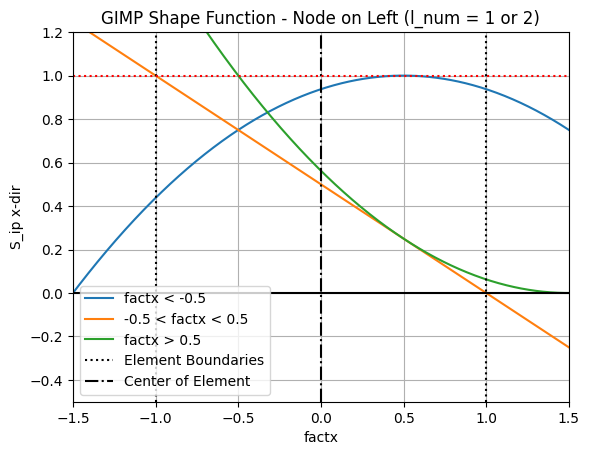

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, s1, label="factx < -0.5")
plt.plot(x, s2, label="-0.5 < factx < 0.5")
plt.plot(x, s3, label="factx > 0.5")
plt.axvline(-1, ls="dotted", c="k", label="Element Boundaries")
plt.axvline(1, ls="dotted", c="k")

plt.axvline(0, ls="-.", c="k", label="Center of Element")
plt.axhline(1, c='r', ls=':')
plt.axhline(0, c='k')
plt.legend()
plt.grid()
plt.ylim(-.5, 1.2)
plt.xlim(-1.5, 1.5)
plt.xlabel("factx")
plt.ylabel("S_ip x-dir")
plt.title("GIMP Shape Function - Node on Left (l_num = 1 or 2)")

Text(0.5, 1.0, 'GIMP Shape Function - Node on Right (L_NUM = 3 or 4)')

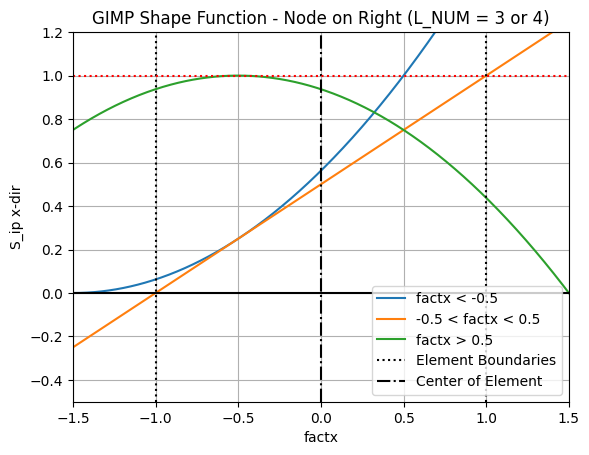

In [7]:
plt.plot(x, s4, label="factx < -0.5")
plt.plot(x, s5, label="-0.5 < factx < 0.5")
plt.plot(x, s6, label="factx > 0.5")
plt.axvline(-1, ls="dotted", c="k", label="Element Boundaries")
plt.axvline(1, ls="dotted", c="k")

plt.axvline(0, ls="-.", c="k", label="Center of Element")
plt.axhline(1, c='r', ls=':')
plt.axhline(0, c='k')
plt.legend()
plt.legend()
plt.grid()
plt.ylim(-.5, 1.2)
plt.xlim(-1.5, 1.5)
plt.xlabel("factx")
plt.ylabel("S_ip x-dir")
plt.title("GIMP Shape Function - Node on Right (L_NUM = 3 or 4)")

In [8]:
# x = np.linspace(-2, 2, 1000)
# s1 = np.array([Sr_1_1(i, 1) for i in x])
# s2 = np.array([Sr_1_2(i, 1) for i in x])
# s3 = np.array([Sr_1_3(i, 1) for i in x])
# s4 = np.array([Sr_2_1(i, 1) for i in x])
# s5 = np.array([Sr_2_2(i, 1) for i in x])
# s6 = np.array([Sr_2_3(i, 1) for i in x])

Text(0.5, 1.0, 'GIMP Shape Functions - Single Axis')

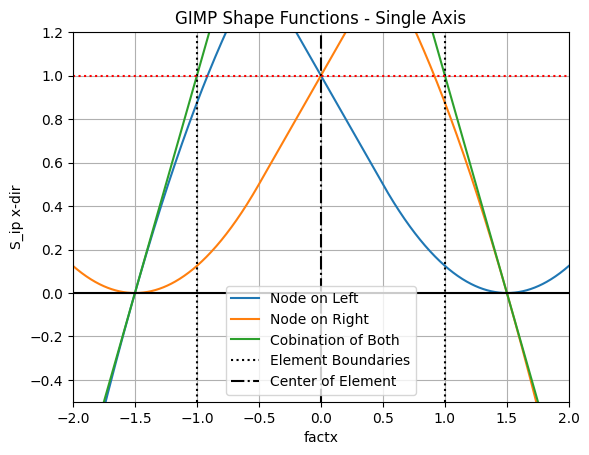

In [9]:
plt.plot(x, s7, label="Node on Left")
plt.plot(x, s8, label="Node on Right")
plt.plot(x, s7+s8, label="Cobination of Both")

plt.axvline(-1, ls="dotted", c="k", label="Element Boundaries")
plt.axvline(1, ls="dotted", c="k")

plt.axvline(0, ls="-.", c="k", label="Center of Element")
plt.axhline(1, c='r', ls=':')
plt.axhline(0, c='k')
plt.legend()
plt.grid()
plt.ylim(-.5, 1.2)
plt.xlim(-2, 2)
plt.xlabel("factx")
plt.ylabel("S_ip x-dir")
plt.title("GIMP Shape Functions - Single Axis")

Text(0.5, 1.0, 'GIMP Shape Function - Lp Variations')

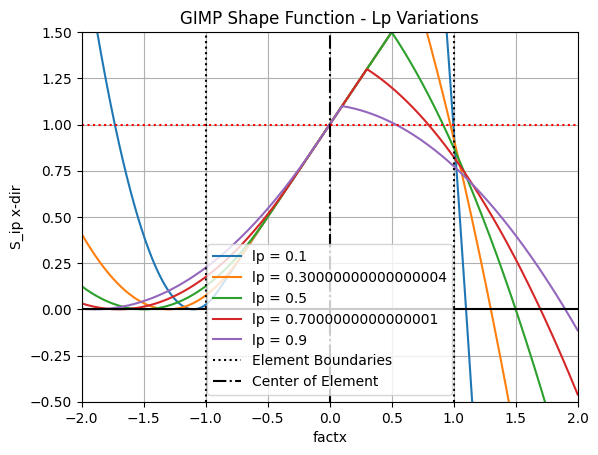

In [10]:
for i, s in enumerate(s9):
    plt.plot(x, s, label=f'lp = {lps[i]}')
    
plt.axvline(-1, ls="dotted", c="k", label="Element Boundaries")
plt.axvline(1, ls="dotted", c="k")

plt.axvline(0, ls="-.", c="k", label="Center of Element")
plt.axhline(1, c='r', ls=':')
plt.axhline(0, c='k')
plt.legend()
plt.grid()
plt.ylim(-.5, 1.5)
plt.xlim(-2, 2)
plt.xlabel("factx")
plt.ylabel("S_ip x-dir")
plt.title("GIMP Shape Function - Lp Variations")

In [11]:
def Svpa(xi1, xi2):
    return 1/4*(2*xi2 - xi2**2 - 2*xi1 + xi1**2)

def Svpb(xi1, xi2):
    return 1/4*(2*xi2 + xi2**2 -2*xi1 - xi1**2)

def xi1(xi_p, lp):
    if (xi_p - lp/2) < -1:
        return -1
    else:
        return xi_p - lp/2
    

def xi2(xi_p, lp):
    if (xi_p + lp/2) > 1:
        return 1
    else:
        return xi_p + lp/2

In [14]:
xi_p = np.linspace(-1.2, 1.2, 1000)
lp = .4 


Svp_a = np.array([Svpa(xi1(xi, lp), xi2(xi, lp)) for xi in xi_p])    
Svp_b = np.array([Svpb(xi1(xi, lp), xi2(xi, lp)) for xi in xi_p])   

(-0.2, 1.2)

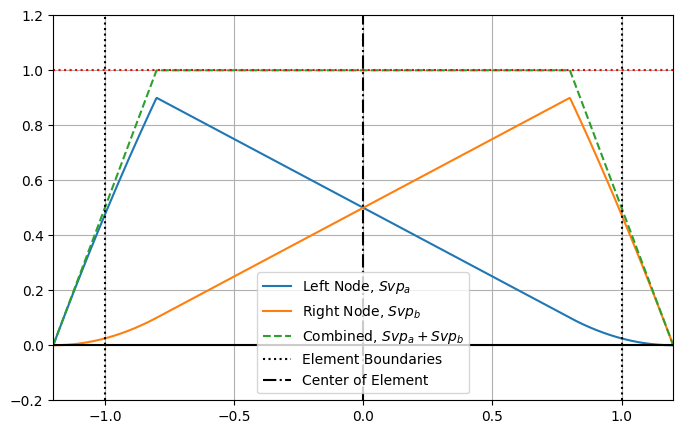

In [15]:
plt.figure(figsize=(8, 5))

plt.plot(xi_p, Svp_a/lp, label='Left Node, ${Svp}_a$')
plt.plot(xi_p, Svp_b/lp, label='Right Node, ${Svp}_b$')
plt.plot(xi_p, (Svp_a+Svp_b)/lp, label='Combined, ${Svp}_a + {Svp}_b$', ls='--')

    
plt.axvline(-1, ls="dotted", c="k", label="Element Boundaries")
plt.axvline(1, ls="dotted", c="k")
plt.axvline(0, ls="-.", c="k", label="Center of Element")
plt.axhline(1, c='r', ls=':')
plt.axhline(0, c='k')
plt.legend()
plt.grid()
plt.xlim(-1.2, 1.2)
plt.ylim(-0.2, 1.2)